In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("personality_synthetic_dataset.csv")
df.head()

,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
0,Extrovert,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,...,4.853313,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905
1,Ambivert,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,...,6.067201,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577
2,Ambivert,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,...,5.524244,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480
3,Extrovert,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,...,4.327018,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088
4,Introvert,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,...,5.187689,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personality_type          20000 non-null  object 
 1   social_energy             20000 non-null  float64
 2   alone_time_preference     20000 non-null  float64
 3   talkativeness             20000 non-null  float64
 4   deep_reflection           20000 non-null  float64
 5   group_comfort             20000 non-null  float64
 6   party_liking              20000 non-null  float64
 7   listening_skill           20000 non-null  float64
 8   empathy                   20000 non-null  float64
 9   creativity                20000 non-null  float64
 10  organization              20000 non-null  float64
 11  leadership                20000 non-null  float64
 12  risk_taking               20000 non-null  float64
 13  public_speaking_comfort   20000 non-null  float64
 14  curios

WCSS values: [40000.00000000003, 15735.635755655036, 10909.997228302005, 8952.581839158489, 7417.477571070784, 6282.6545427720675, 5442.721049781575, 4823.0063963625435, 4300.398016472214, 3852.29724397335]


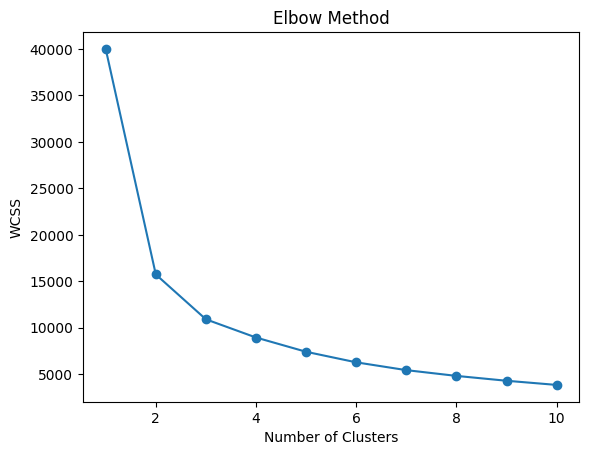

In [3]:
X= df[['talkativeness', 'alone_time_preference']]
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

print("WCSS values:", wcss)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head(5)

,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,...,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling,Cluster
0,Extrovert,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,...,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905,2
1,Ambivert,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,...,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577,1
2,Ambivert,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,...,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480,1
3,Extrovert,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,...,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088,2
4,Introvert,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,...,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084,0


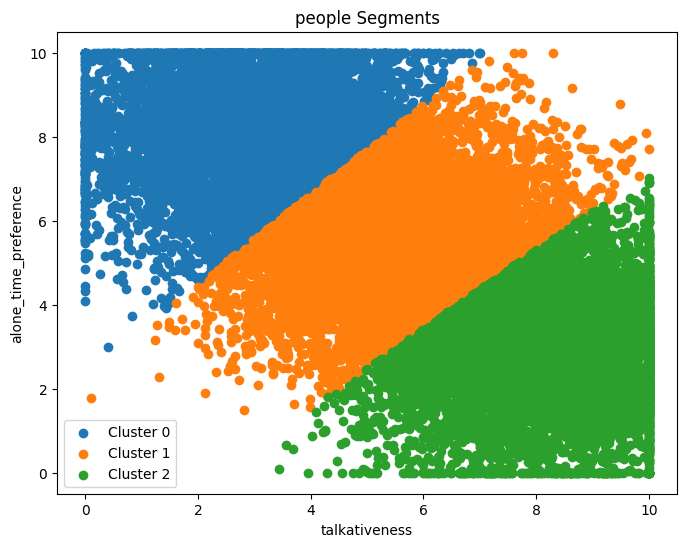

In [5]:
plt.figure(figsize=(8,6))
for cluster in range(3):
    plt.scatter(
        df[df['Cluster'] == cluster]['talkativeness'],
        df[df['Cluster'] == cluster]['alone_time_preference'],
        label=f'Cluster {cluster}'
    )

plt.xlabel('talkativeness')
plt.ylabel('alone_time_preference')
plt.title('people Segments')
plt.legend()
plt.show()

In [6]:
import joblib


joblib.dump(scaler, "scaler.pkl")
joblib.dump(kmeans, "kmeans_model.pkl")

['kmeans_model.pkl']